##Assignment 1: Compare Tests for Goodness of fit (on real data)

**Test whether a gaussian model N($\mu$, $\sigma$) for the *age distribution of citibike drivers* is a sensible model**, or if you can find a better fit with another distribution.

**Use 2 tests**: KS, AD, KL, chisq (even though we have not talked about it in detail yet) to do this.

**Test at the Normal and a least one other distributions** (e.g. Poisson, or Binomial, or Chisq, Lognormal.......)

No skeleton: you are on your own!

Extra credit: Divide your sample geographically: by Borrow + split Manhattan in an Uptown and a Downtown sample (use your discretion to do so, but ZIP code is a good idea) and see if you notice any differences in how the age distribution can be modeled.

GRADING:

Your notebook must:

state the $H_0$ correcty
generate the distributions correctly.
use the test correctly
make conclusions about the rejection of the Null
each plot must have a caption which describes the plot in terms of Central Limit Theorem

# Null hypothesis:

$H_0 = F_age - F_G = 0$

The ages of citibike users are drawn from a gaussian distribution. 

In [15]:
from __future__ import print_function, division
import numpy as np
import pylab as pl

import numpy as np
import pandas as pd
import zipfile
import csv
import scipy

import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
datestring = '201501'
!curl -O "https://s3.amazonaws.com/tripdata/{datestring}-citibike-tripdata.zip"

#https://discuss.analyticsvidhya.com/t/how-to-read-zip-file-directly-in-python/1659
zf = zipfile.ZipFile(datestring+'-citibike-tripdata.zip')
df = pd.read_csv(zf.open(datestring+'-citibike-tripdata.csv'))

df.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6845k  100 6845k    0     0  16.5M      0 --:--:-- --:--:-- --:--:-- 28.3M


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [4]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [5]:
df['age'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber')]

In [6]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'age'],
      dtype='object')

In [33]:
df['age'].dropna(inplace= True)
df['age'].head()

0    55.0
1    52.0
2    41.0
3    46.0
4    38.0
Name: age, dtype: float64

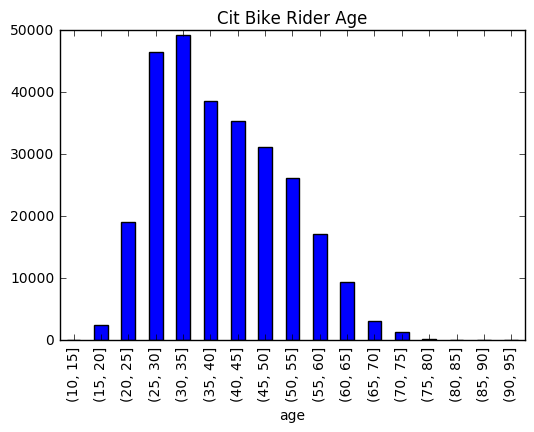

In [34]:
#(df['age']).hist(bins = 20)
#pl.title('Citibike Rider Age', fontsize=18)
#pl.xlabel('Rider Age', fontsize = 18)
#pl.ylabel('N', fontsize = 18)


bins = np.arange(10, 99, 5)
ax = df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
ax.set_title("Cit Bike Rider Age")

**Figure 1**: Distribution of ages of citibike riders, absolute count.

# KS Test

In [35]:
df['age'].values

array([ 55.,  52.,  41., ...,  21.,  58.,  41.])

In [36]:
scipy.stats.kstest(df['age'].values, 'norm', args=(df.age.mean(),df.age.std()))
#First entry is rvs = observations that we are trying to determine the distribution of
#second entry = cdf = ditribution we are trying to match it to, call 'norm'
#a standard normal will have a mean of 0, st dev 1

KstestResult(statistic=0.087552112722896369, pvalue=0.0)

## The p-value is 0.0, so we can reject the null hypothesis that the ages of citibike riders are drawn from a normal distribution.

In [42]:
scipy.stats.chi2?

In [45]:
scipy.stats.kstest(df['age'].values, 'chi2', args=(df.age.mean(),df.age.std()))

KstestResult(statistic=0.58248220750759483, pvalue=0.0)

##  <span style="color: red;"> The p value is 0.0, so we can reject the null hypothesis that the ages of citibike riders are drawn from a chi-squared distribution. </span>

# AD Test

In [51]:
scipy.stats.anderson(df['age'].values)

AndersonResult(statistic=2732.9753468561685, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

Critical values provided are for the following significance levels:

normal/exponenential
    15%, 10%, 5%, 2.5%, 1%
logistic
    25%, 10%, 5%, 2.5%, 1%, 0.5%
Gumbel
    25%, 10%, 5%, 2.5%, 1%

If A2 is larger than these critical values then for the corresponding
significance level, the null hypothesis that the data come from the
chosen distribution can be rejected.

### The AD statistic is 2732.  To reject the null with a confidence level below 1%, then the statistic value must be above 1.092. The AD stat is well above that, so we reject the null hypothesis that the ages of citibike riders are drawn from the *normal distribution*.

In [53]:
scipy.stats.anderson(df['age'].values, dist= 'logistic')

AndersonResult(statistic=2893.1871237001615, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))

### The AD statistic is 2893.  To reject the null with a confidence level below 1%, then the statistic value must be above 1.092. The AD stat is well above that, so we reject the null hypothesis that the ages of citibike riders are drawn from the *logistic distribution*.